In [ ]:
import axelrod as axl

In [13]:
# players = [axl.Cooperator(), axl.Defector(),
#            axl.TitForTat(), axl.Grudger(),
#            axl.EvolvedLookerUp2_2_2(),axl.EvolvedHMM5(),
#            axl.EvolvedANN5()]

In [36]:
all_players = [s() for s in axl.strategies]
number_of_strategies = len(all_players)

Playing matches:   0%|          | 0/1 [2:41:17<?, ?it/s]


In [60]:
tournament = axl.Tournament(
     players=all_players,
     turns=20,
     repetitions=5,
     seed=1,
)

In [61]:
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]


In [ ]:
results.summarise()

In [ ]:
results.write_summary('./summary_20_round_all_players.csv')
import csv
with open('./summary_20_round_all_players.csv', 'r') as outfile:
    csvreader = csv.reader(outfile)
    for row in csvreader:
        print(row)

In [26]:
import pandas as pd
dat_standard_processed = pd.read_csv("./Data/10246247/standard_processed.csv")
dat_probend_processed = pd.read_csv("./Data/10246247/probend_processed.csv")
dat_noise_processed = pd.read_csv("./Data/10246247/noise_processed.csv")
dat_probend_noise_processed = pd.read_csv("./Data/10246247/probend_noise_processed.csv")

In [72]:
dat_standard_processed.head()

,Unnamed: 0,Rank,Name,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,...,Makes_use_of_length,Cooperation_rating_max,Cooperation_rating_min,Cooperation_rating_median,Cooperation_rating_mean,Cooperation_rating_comp_to_max,Cooperation_rating_comp_to_min,Cooperation_rating_comp_to_median,Cooperation_rating_comp_to_mean,memory_usage
0,0,0,EvolvedLookerUp2_2_2,2.969925,0.704614,28.0,1.0,0.639084,0.065530,0.189481,...,0,0.966144,0.0,0.664537,0.60628,0.729305,0.0,1.060307,1.162192,1.000000
1,1,1,Evolved FSM 16 Noise 05,2.874888,0.696800,21.0,1.0,0.676353,0.020448,0.135146,...,0,0.966144,0.0,0.664537,0.60628,0.721218,0.0,1.048550,1.149304,1.000000
2,2,2,PSO Gambler 1_1_1,2.874216,0.684317,23.0,1.0,0.650701,0.033616,0.151543,...,0,0.966144,0.0,0.664537,0.60628,0.708298,0.0,1.029765,1.128714,1.000000
3,3,3,PSO Gambler Mem1,2.861493,0.705582,23.0,1.0,0.663295,0.042287,0.144599,...,0,0.966144,0.0,0.664537,0.60628,0.730308,0.0,1.061764,1.163789,0.007463
4,4,4,Winner12,2.834701,0.681854,20.0,1.0,0.650588,0.031267,0.140920,...,0,0.966144,0.0,0.664537,0.60628,0.705749,0.0,1.026059,1.124652,0.014925


In [30]:
dat_standard_processed.columns

Index(['Unnamed: 0', 'Rank', 'Name', 'Median_score', 'Cooperation_rating',
       'Wins', 'Initial_C_rate', 'CC_rate', 'CD_rate', 'DC_rate', 'DD_rate',
       'CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate', 'noise',
       'turns', 'repetitions', 'size', 'seed', 'Normalized_Rank', 'SSE',
       'cluster_on_0.05', 'cluster_on_0.25', 'cluster_on_0.5', 'Stochastic',
       'Memory_depth', 'Makes_use_of_game', 'Makes_use_of_length',
       'Cooperation_rating_max', 'Cooperation_rating_min',
       'Cooperation_rating_median', 'Cooperation_rating_mean',
       'Cooperation_rating_comp_to_max', 'Cooperation_rating_comp_to_min',
       'Cooperation_rating_comp_to_median', 'Cooperation_rating_comp_to_mean',
       'memory_usage'],
      dtype='object')

In [32]:
import numpy as np
print(np.min(dat_standard_processed["noise"]))
print(np.max(dat_standard_processed["noise"]))

2.106765810538924e-05
0.9999987263048828


In [83]:
dat_standard_processed["cluster_on_0.05"].value_counts()

cluster_on_0.05
0    947396
1     55407
Name: count, dtype: int64

In [85]:
dat_standard_processed["cluster_on_0.25"].value_counts()

cluster_on_0.25
0    747818
1    254985
Name: count, dtype: int64

In [88]:
dat_standard_processed["cluster_on_0.5"].value_counts()

cluster_on_0.5
1    504190
0    498613
Name: count, dtype: int64

In [89]:
dat_sse0 = dat_standard_processed.query("SSE==0")
dat_sse0.Name.value_counts()

Name
ALLCorALLD                5218
Contrite Tit For Tat      5185
Tit For Tat               5048
Suspicious Tit For Tat    4995
Cooperator                4855
                          ... 
Soft Go By Majority 40       2
Soft Go By Majority 10       2
Hard Go By Majority 5        2
Evolved ANN                  1
Hard Go By Majority 40       1
Name: count, Length: 72, dtype: int64

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import shap
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [13]:
# Load your data (replace 'your_data.csv' with your actual data file)
df = dat_standard_processed.copy()

# Replace inf values with 999
df = df.replace([np.inf, -np.inf], 999)

# Define features and target # 'CC_rate', 'CD_rate', 'DC_rate', 'DD_rate', 'size'
features = ['Initial_C_rate', 
            'CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate', 'Stochastic',
            'Memory_depth', 'Makes_use_of_game', 'Makes_use_of_length',
            'Cooperation_rating_max', 'Cooperation_rating_min',
            'Cooperation_rating_median', 'Cooperation_rating_mean',
            'Cooperation_rating_comp_to_max', 'Cooperation_rating_comp_to_min',
            'Cooperation_rating_comp_to_median', 'Cooperation_rating_comp_to_mean',
            'memory_usage', 'SSE', 'turns', 'repetitions']

target = 'Rank'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the XGBoost model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")



Mean Squared Error: 195.8245189630665
R-squared Score: 0.8994847536087036


[12:44:11] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_b6b50u1t0e/croot/xgboost-split_1713972723244/work/cpp_src/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


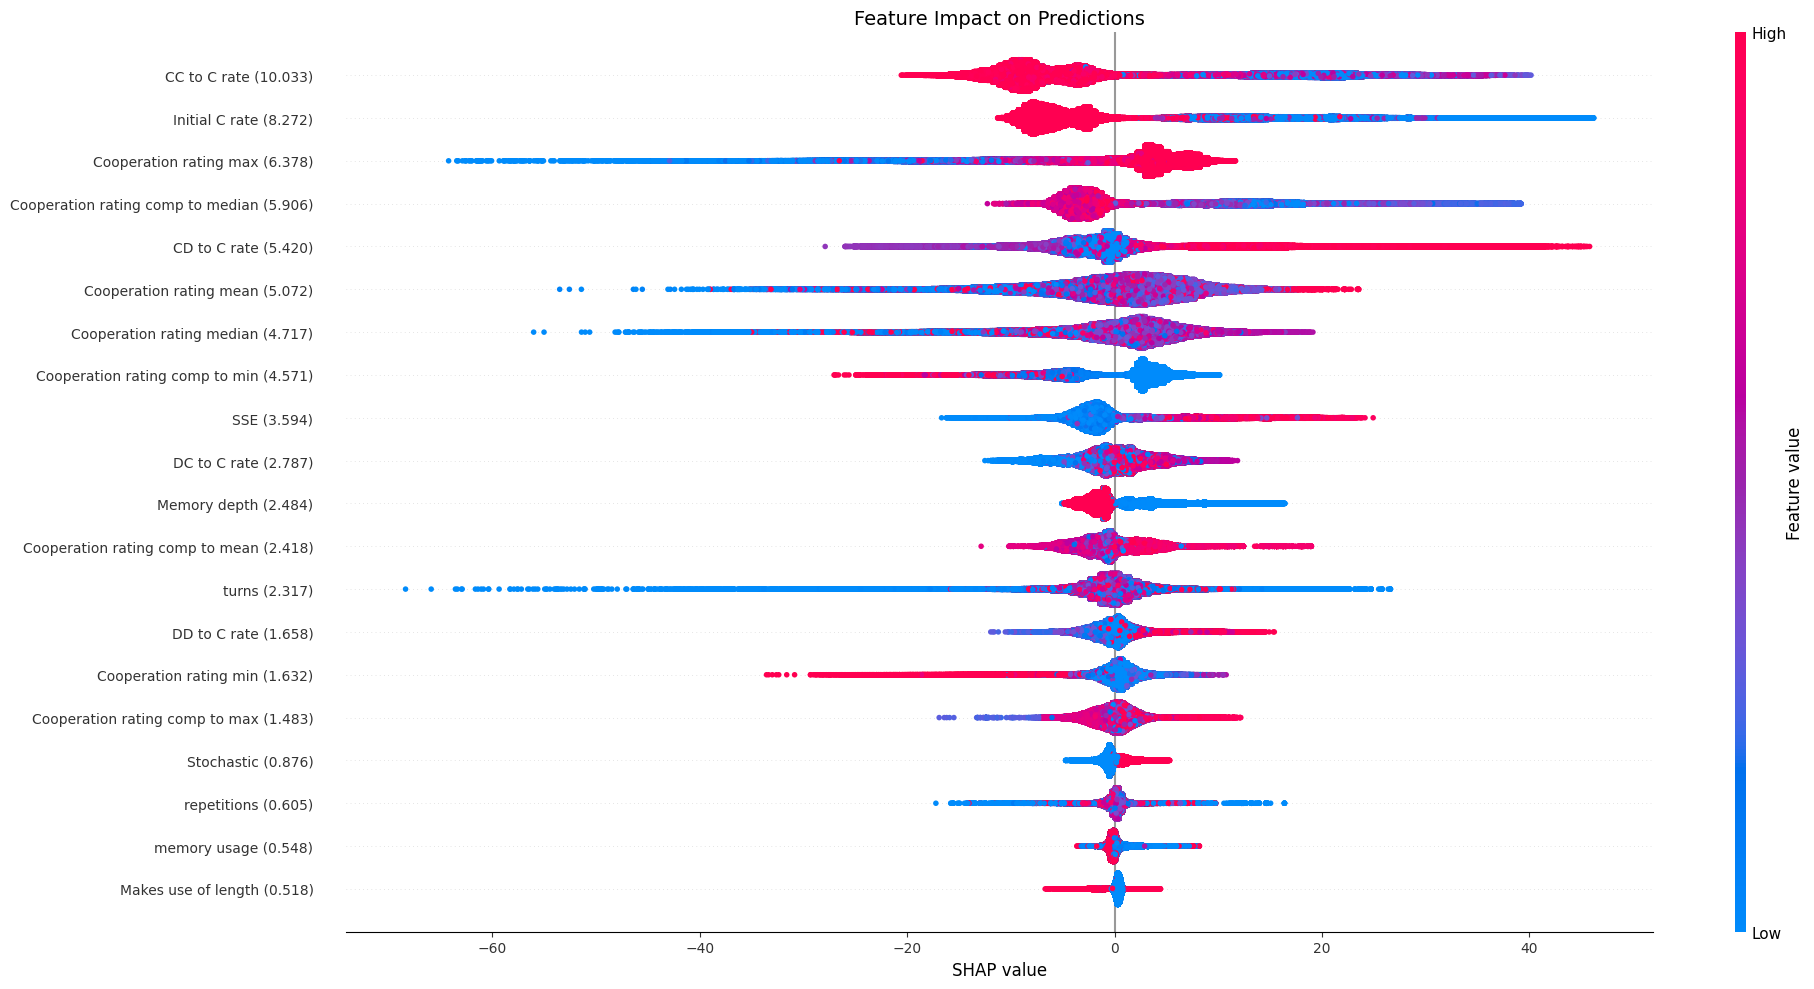


Feature Importance based on SHAP values:
                              feature  importance
1                        CC_to_C_rate   10.032801
0                      Initial_C_rate    8.272223
9              Cooperation_rating_max    6.377802
15  Cooperation_rating_comp_to_median    5.905852
2                        CD_to_C_rate    5.419701
12            Cooperation_rating_mean    5.072174
11          Cooperation_rating_median    4.717041
14     Cooperation_rating_comp_to_min    4.571257
18                                SSE    3.594268
3                        DC_to_C_rate    2.786718
6                        Memory_depth    2.483945
16    Cooperation_rating_comp_to_mean    2.417763
19                              turns    2.317281
4                        DD_to_C_rate    1.658350
10             Cooperation_rating_min    1.631818
13     Cooperation_rating_comp_to_max    1.483008
5                          Stochastic    0.875943
20                        repetitions    0.605301
17      

In [25]:
# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_scaled)

# Calculate feature importance based on SHAP values
feature_importance = np.abs(shap_values).mean(0)
feature_importance_df = pd.DataFrame(list(zip(features, feature_importance)),
                                     columns=['feature', 'importance'])
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Create a mapping to remove underscores from feature names and add importance values
feature_names_no_underscore = [f"{name.replace('_', ' ')} ({importance:.3f})" 
                               for name, importance in zip(features, feature_importance)]

# Visualize SHAP values
# Set the style to use larger plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = [20, 10]  # Increase width (20) and height (10)

# Create another plot for the summary plot (not bar plot)
plt.figure(figsize=(20, 10))
shap.summary_plot(
    shap_values, 
    X_train,
    feature_names=feature_names_no_underscore,
    show=False
)

# Modify the plot
plt.gcf().set_size_inches(20, 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('SHAP value', fontsize=12)
plt.title('Feature Impact on Predictions', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()